# Data Cleaning and EDA

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/Users/brianchoi/Documents/Data_Science/Projects/NBA_Draft_Prediction/Data/collegeplayer_cleaned.csv")


In [3]:
data.head()

,Unnamed: 0,player_name,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Oklahoma St.,B12,...,2.53637,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.87260
1,1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,USC,P12,...,5.25248,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.10197
2,2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Florida St.,ACC,...,2.99510,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.85045
3,3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Gonzaga,WCC,...,4.11123,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.42283
4,4,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Michigan,B10,...,3.05480,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,9.22711


In [4]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0      player_name                    TEAM  \
0              0  Cade Cunningham         Detroit Pistons   
1              1      Evan Mobley     Cleveland Cavaliers   
2              2   Scottie Barnes         Toronto Raptors   
3              3      Jalen Suggs           Orlando Magic   
4              4     Franz Wagner           Orlando Magic   
...          ...              ...                     ...   
1482        1482      Patty Mills  Portland Trail Blazers   
1483        1483     Ahmad Nivins        Dallas Mavericks   
1484        1484    Lester Hudson          Boston Celtics   
1485        1485  Chinemelu Elonu      Los Angeles Lakers   
1486        1486    Robert Dozier              Miami Heat   

              AFFILIATION    YEAR  ROUND  ROUND.1  OVERALL              team  \
0          Oklahoma State  2021.0      1        1        1      Oklahoma St.   
1     Southern California  2021.0      1        3        3               

In [5]:
# Dropping unnecessary columns

data.drop(columns=['ht', 'type', 'TEAM', 'team', 'YEAR', 'player_name', 'Unnamed: 0', 'Unnamed: 65', 'num', 'rimmade', 'rimmade+rimmiss', 'midmade', 
'midmade+midmiss', 'dunksmade', 'dunksmiss+dunksmade', 'pick', 'pfr', 'pid', 'gbpm', 'ogbpm', 'dgbpm', 'year'], inplace=True)

In [6]:
data.head()

,AFFILIATION,ROUND,ROUND.1,OVERALL,conf,GP,Min_per,Ortg,usg,eFG,...,dbpm,mp,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64
0,Oklahoma State,1,1,1,B12,27,78.0,104.1,28.6,51.6,...,3.08975,35.4074,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F
1,Southern California,1,3,3,P12,33,83.6,119.4,23.4,59.5,...,7.46638,33.9394,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C
2,Florida State,1,4,4,ACC,24,58.9,107.5,25.3,53.1,...,3.32516,24.7917,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG
3,Gonzaga,1,5,5,WCC,30,67.5,110.4,25.3,55.9,...,4.47315,28.9333,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G
4,Michigan,1,8,8,B10,27,66.1,105.5,18.6,53.4,...,3.22572,30.7407,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F


In [7]:
# Renaming column
data.rename(columns={'Unnamed: 64': 'Position'}, inplace=True)

In [8]:
# Creating the target class (Round 1 value and Round 2 value)
data['Class'] = data.ROUND.apply(lambda x: 1 if x == 1 else 2)

In [9]:
data

,AFFILIATION,ROUND,ROUND.1,OVERALL,conf,GP,Min_per,Ortg,usg,eFG,...,mp,oreb,dreb,treb,ast,stl,blk,pts,Position,Class
0,Oklahoma State,1,1,1,B12,27,78.0,104.1,28.6,51.6,...,35.4074,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,1
1,Southern California,1,3,3,P12,33,83.6,119.4,23.4,59.5,...,33.9394,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,1
2,Florida State,1,4,4,ACC,24,58.9,107.5,25.3,53.1,...,24.7917,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,1
3,Gonzaga,1,5,5,WCC,30,67.5,110.4,25.3,55.9,...,28.9333,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,1
4,Michigan,1,8,8,B10,27,66.1,105.5,18.6,53.4,...,30.7407,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,St. Mary's (CA),2,25,55,WCC,24,61.7,108.8,29.0,47.6,...,33.9583,0.4583,1.8333,2.2917,3.7917,2.2083,0.2083,18.6250,NaN,2
1483,Saint Joseph's,2,26,56,A10,32,96.5,119.7,22.9,61.2,...,39.3438,3.9375,7.8750,11.8125,1.0000,0.8125,1.7500,19.1562,NaN,2
1484,Tennessee-Martin,2,28,58,OVC,30,90.6,115.3,35.5,51.7,...,36.5333,2.2000,5.8667,8.0667,4.1333,2.1000,0.6000,27.7333,NaN,2
1485,Texas A&M,2,29,59,B12,33,59.1,112.0,20.4,66.3,...,23.7273,2.7879,4.4242,7.2121,0.3030,0.3030,1.5758,9.7273,NaN,2


In [10]:
# Drop more unneccessary columns
data.drop(columns=['ROUND', 'ROUND.1', 'OVERALL'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AFFILIATION                      1487 non-null   object 
 1   conf                             1487 non-null   object 
 2   GP                               1487 non-null   int64  
 3   Min_per                          1487 non-null   float64
 4   Ortg                             1487 non-null   float64
 5   usg                              1487 non-null   float64
 6   eFG                              1487 non-null   float64
 7   TS_per                           1487 non-null   float64
 8   ORB_per                          1487 non-null   float64
 9   DRB_per                          1487 non-null   float64
 10  AST_per                          1487 non-null   float64
 11  TO_per                           1487 non-null   float64
 12  FTM                 

## Exploratory Data Analysis

In [12]:
# Separating dataframes by Class

# First Round Picks
first_round = data[data.Class == 1]

# Second Round Picks
second_round = data[data.Class == 2]

In [15]:
first_round

,AFFILIATION,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,oreb,dreb,treb,ast,stl,blk,pts,Position,Class
0,Oklahoma State,B12,27,78.0,104.1,28.6,51.6,57.46,2.3,16.2,...,35.4074,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,1
1,Southern California,P12,33,83.6,119.4,23.4,59.5,62.40,9.7,18.8,...,33.9394,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,1
2,Florida State,ACC,24,58.9,107.5,25.3,53.1,54.78,7.4,11.0,...,24.7917,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,1
3,Gonzaga,WCC,30,67.5,110.4,25.3,55.9,59.39,2.7,18.0,...,28.9333,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,1
4,Michigan,B10,27,66.1,105.5,18.6,53.4,56.59,3.4,16.8,...,30.7407,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Ohio State,B10,33,50.3,106.2,23.2,63.8,62.88,11.6,17.1,...,20.3333,1.6667,3.0000,4.6667,0.2727,0.4848,1.1212,8.8485,NaN,1
1462,Southern California,P10,35,83.6,117.1,21.5,60.1,62.12,13.4,19.0,...,33.6857,3.5143,5.5143,9.0286,1.2571,0.9714,2.8571,14.2857,NaN,1
1463,Missouri,B12,38,70.0,118.8,25.1,57.6,59.15,9.3,18.6,...,28.0000,2.4211,4.7632,7.1842,2.1579,1.5526,0.6579,16.5526,NaN,1
1464,North Carolina,ACC,37,76.4,123.7,20.4,57.5,60.10,5.4,10.9,...,30.6486,1.5405,3.3784,4.9189,2.7027,0.8919,0.1622,15.8919,NaN,1


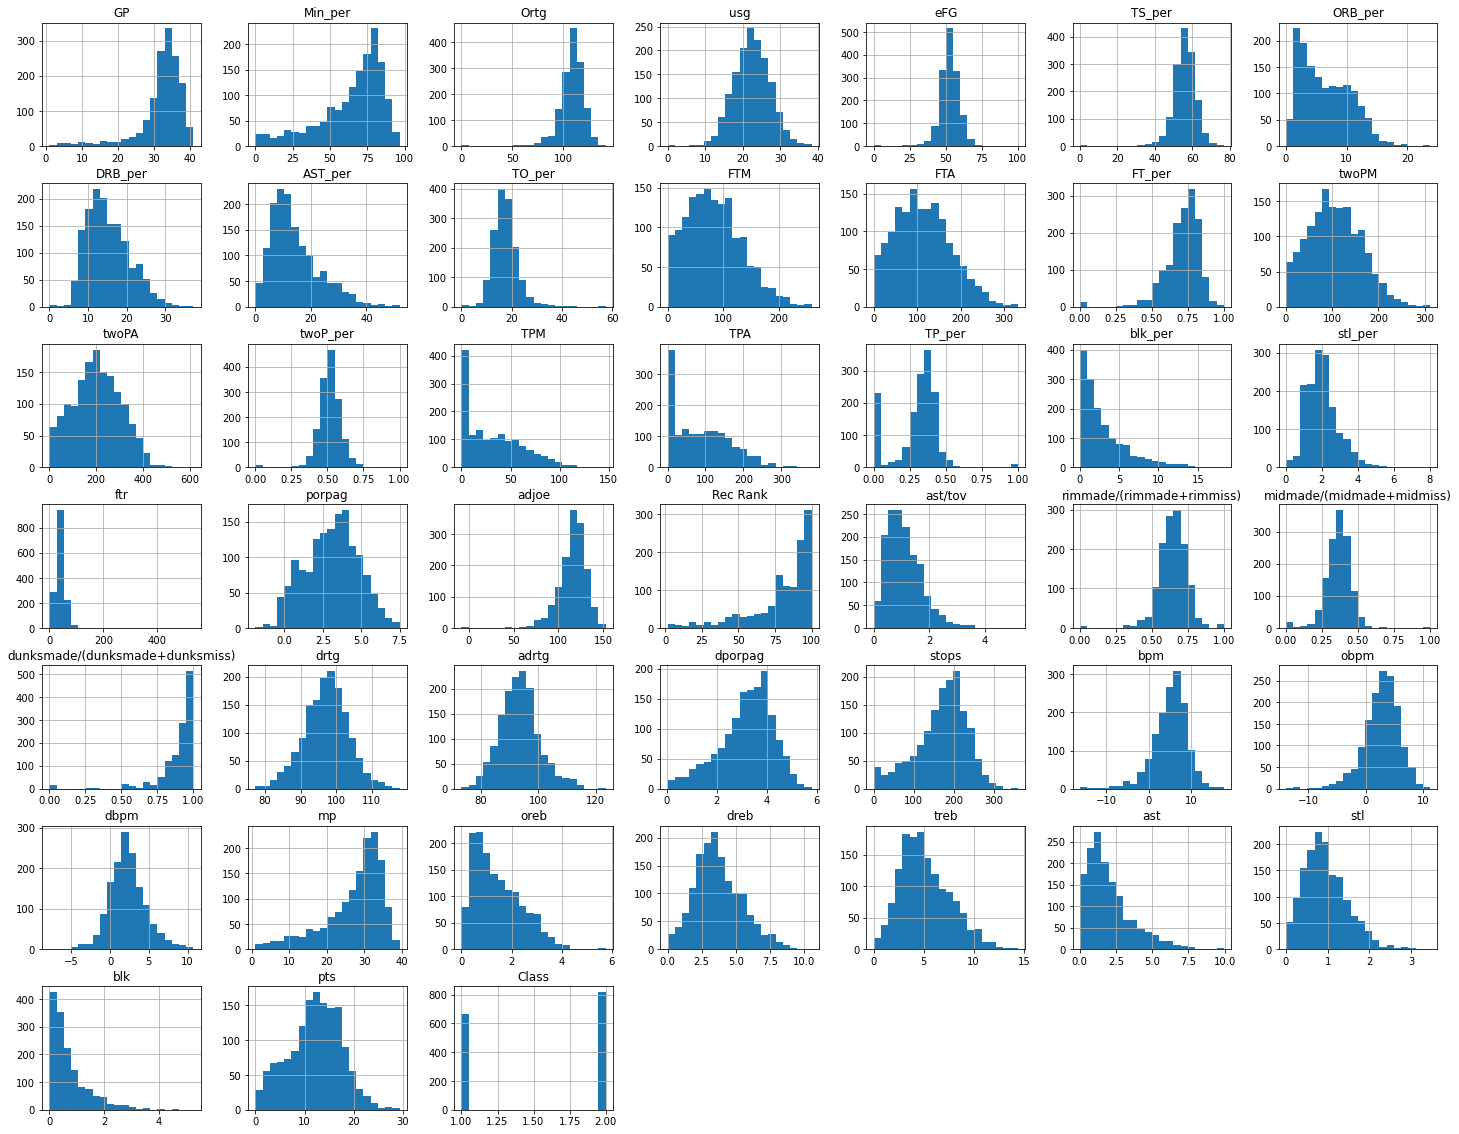

In [16]:
data.hist(bins=20, figsize=(25,20))
plt.show()

In [20]:
# Most frequent conferences in first round picks
conf_first = first_round.groupby(['conf'])['Class'].count().sort_values(ascending=False).iloc[:10].reset_index()

# Most frequent conferences in second round picks
conf_second = second_round.groupby(['conf'])['Class'].count().sort_values(ascending=False).iloc[:10].reset_index()


In [21]:
conf_first

,conf,Class
0,ACC,140
1,SEC,82
2,B10,72
3,B12,66
4,BE,64
5,P12,63
6,MWC,26
7,P10,23
8,A10,17
9,WCC,16


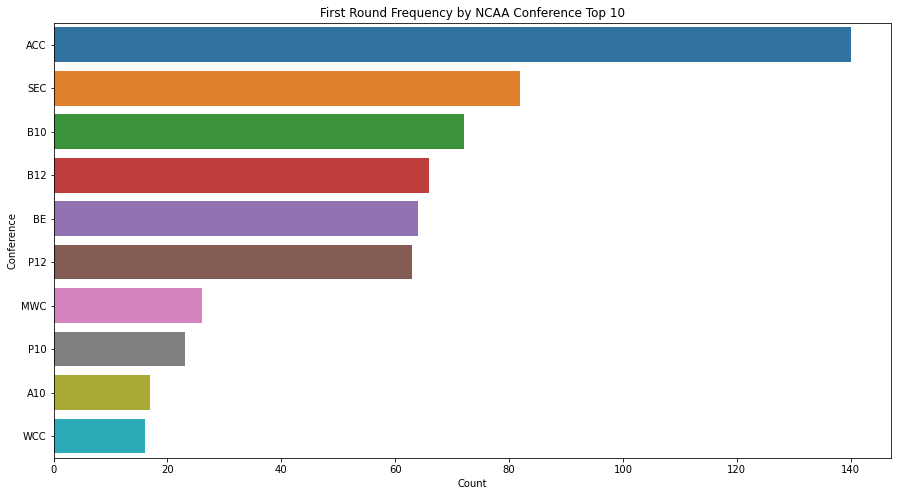

In [23]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='conf', data=conf_first)
ax.set_title('First Round Frequency by NCAA Conference Top 10')
ax.set_ylabel('Conference')
ax.set_xlabel('Count')
plt.show()

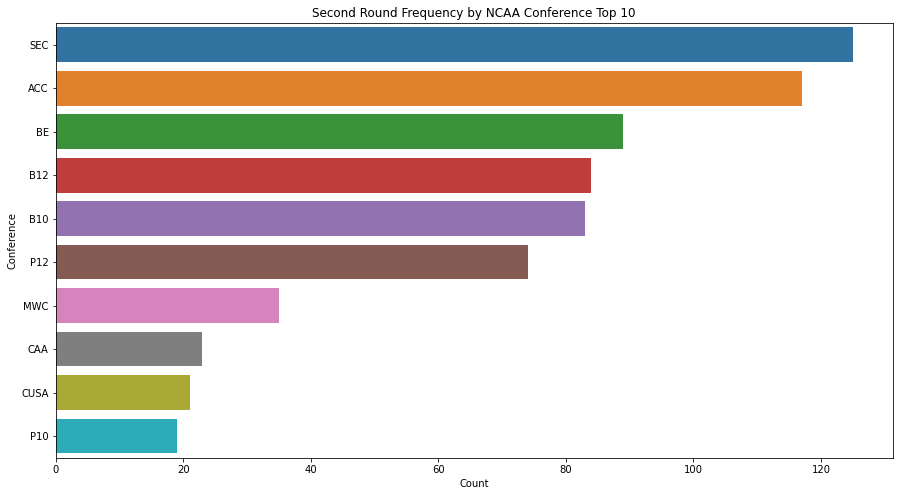

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='conf', data=conf_second)
ax.set_title('Second Round Frequency by NCAA Conference Top 10')
ax.set_ylabel('Conference')
ax.set_xlabel('Count')
plt.show()

### Insights - Conferences
There seems to be a coorelation between round drafted and affilated conference. SEC and ACC are both top two in each round, while the next 8 in the list vary. This seems likely to be a quality predictor in our machine learning models.

In [27]:
# Most frequent positions in first round picks
pos_first = first_round.dropna().groupby(['Position'])['Class'].count().sort_values(ascending=False).reset_index()

# Most frequent positions in second round picks
pos_second = second_round.dropna().groupby(['Position'])['Class'].count().sort_values(ascending=False).reset_index()


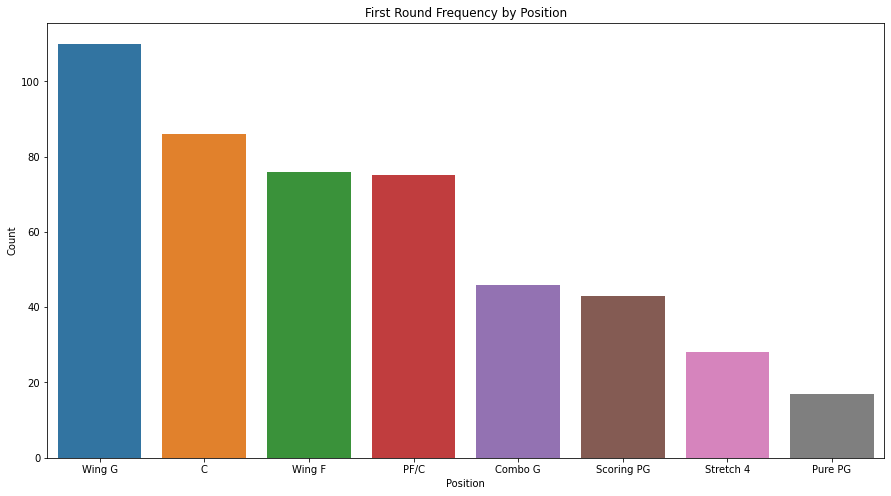

In [28]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Position', y='Class', data=pos_first)
ax.set_title('First Round Frequency by Position')
ax.set_ylabel('Count')
ax.set_xlabel('Position')
plt.show()

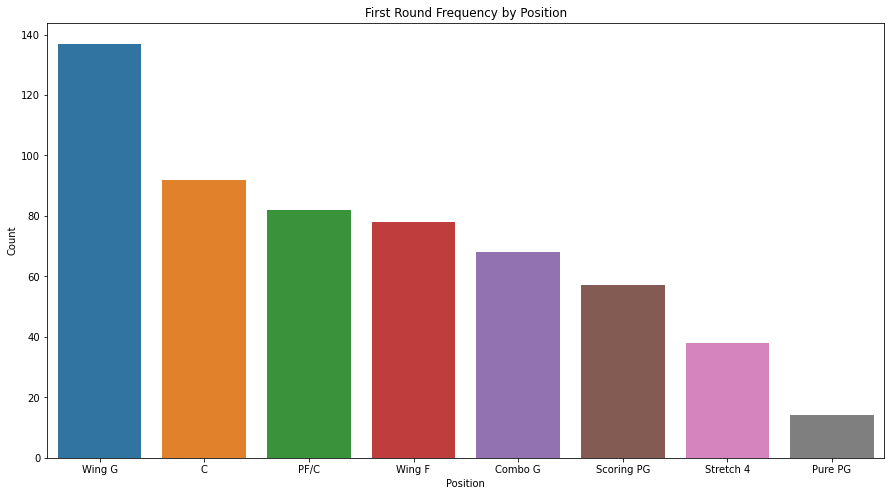

In [29]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Position', y='Class', data=pos_second)
ax.set_title('First Round Frequency by Position')
ax.set_ylabel('Count')
ax.set_xlabel('Position')
plt.show()

### Insights - Position
There doesn't seem to be any coorelation between position and drafted round. The counts and order of positions for both classes are almost equlivalent.

In [35]:
# Most frequent colleges in first round picks
team_first = first_round.groupby(['AFFILIATION'])['Class'].count().sort_values(ascending=False).iloc[:20].reset_index()

# Most frequent colleges in second round picks
team_second = second_round.groupby(['AFFILIATION'])['Class'].count().sort_values(ascending=False).iloc[:20].reset_index()


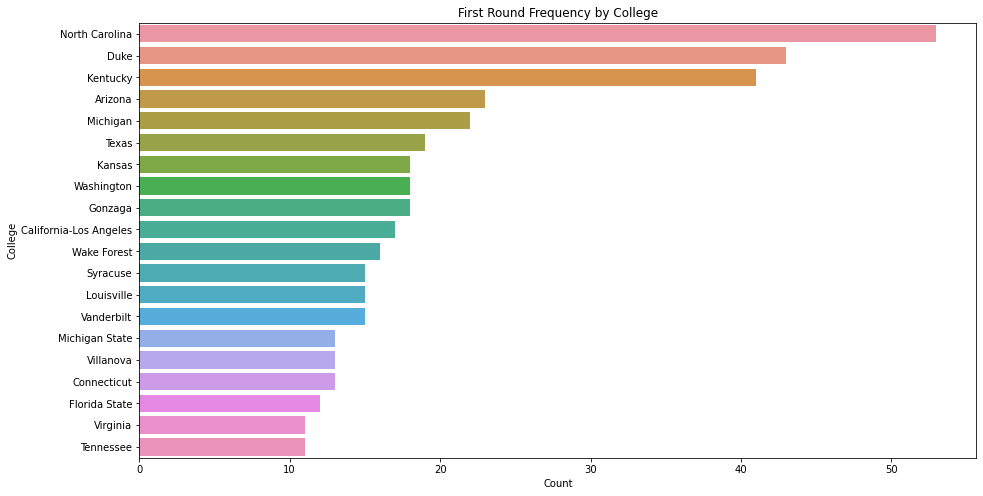

In [38]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='AFFILIATION', data=team_first)
ax.set_title('First Round Frequency by College')
ax.set_ylabel('College')
ax.set_xlabel('Count')
plt.show()

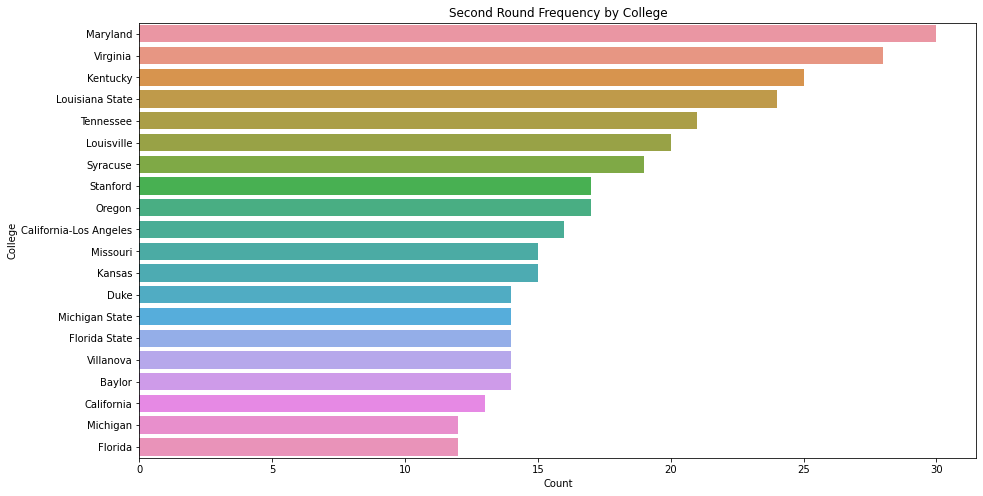

In [39]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='AFFILIATION', data=team_second)
ax.set_title('Second Round Frequency by College')
ax.set_ylabel('College')
ax.set_xlabel('Count')
plt.show()

### Insights - Teams
There's seems to be a high coorelation between the drafted round and the team the player is affilated with. Duke and North Carolina dominate the top two spots in the first round while not having much impact in the second round. On the other hand, Maryland has many players in the second round while not placing in the top twenty for the first round.

In [46]:
# Most frequent graduation status in first round
grad_first = first_round.groupby(['yr'])['Class'].count().sort_values(ascending=False).reset_index()

# Most frequent graduation status in second round
grad_second = second_round.groupby(['yr'])['Class'].count().sort_values(ascending=False).reset_index()

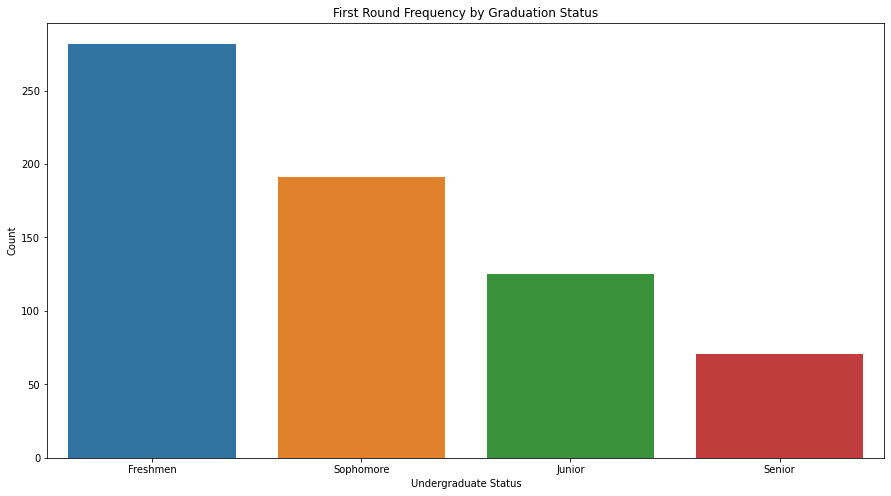

In [49]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='yr', y='Class', data=grad_first)
ax.set_title('First Round Frequency by Graduation Status')
ax.set_ylabel('Count')
ax.set_xlabel('Undergraduate Status')
ax.set_xticklabels(['Freshmen', 'Sophomore', 'Junior', 'Senior'])
plt.show()

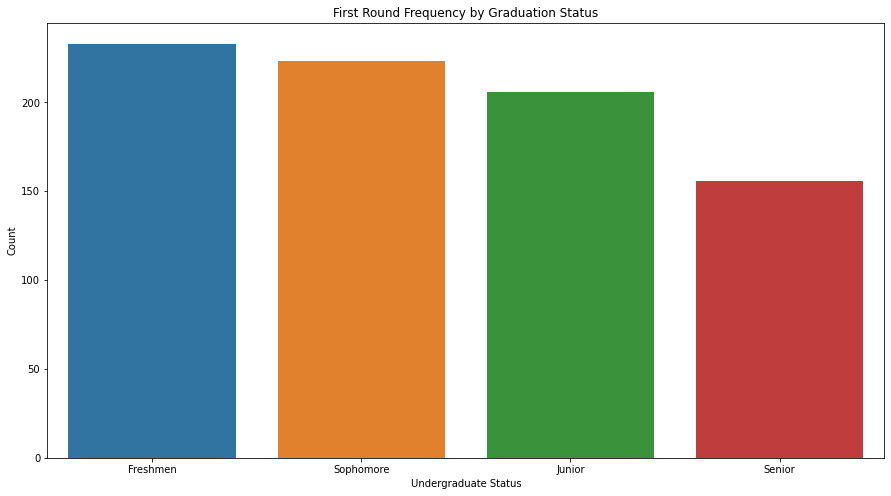

In [52]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='yr', y='Class', data=grad_second)
ax.set_title('First Round Frequency by Graduation Status')
ax.set_ylabel('Count')
ax.set_xlabel('Undergraduate Status')
ax.set_xticklabels(['Freshmen', 'Sophomore', 'Junior', 'Senior'])
plt.show()

### Insights - Graduation Stats
There seems to be a mild coorelation between round pick and graduation status. Freshmen dominate both the first and second round. However, upperclassmen having much higher frequencies in the second round compared to the first round.

## Numerical Indicators

In [53]:
# Aggregation by Class

agg_data = data.groupby('Class').agg(['mean', 'median'])
agg_data

GP           Min_per               Ortg               usg  \
            mean median       mean median        mean median       mean   
Class                                                                     
1      31.796712   33.0  64.186846   70.9  109.483408  110.4  22.703587   
2      31.531785   33.0  64.492787   70.5  107.869193  108.9  22.189976   

                    eFG         ...      treb               ast          \
      median       mean median  ...      mean  median      mean  median   
Class                           ...                                       
1       22.8  53.123019   53.1  ...  5.305388  4.9394  2.057875  1.6176   
2       22.1  51.921883   52.5  ...  5.046038  4.6493  2.034722  1.6429   

            stl               blk                pts           
           mean  median      mean  median       mean   median  
Class                                                          
1      1.008409  0.9167  0.769913  0.5238  12.510605  12.9474  
2      0.909462  0.8550  0.697984  0.4706  11.918521  12.3333  

[2 rows x 88 columns]

In [56]:
plotting = []

for i in list(agg_data.columns):
    if i[0] in plotting:
        continue
    else:
        plotting.append(i[0])

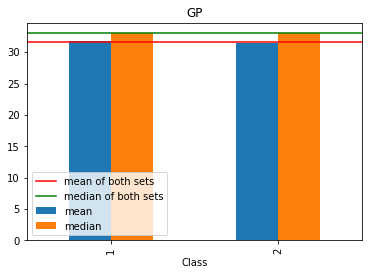

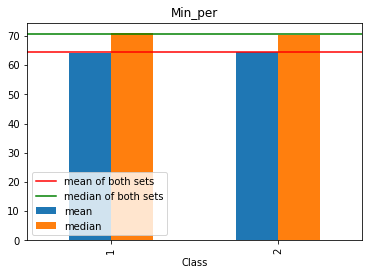

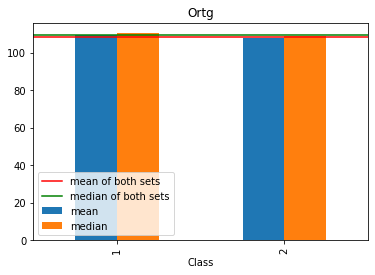

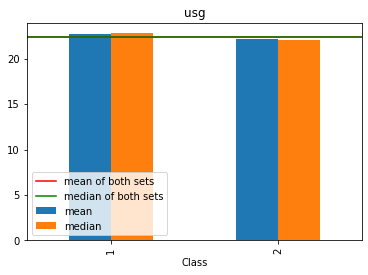

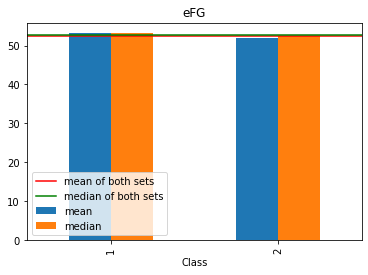

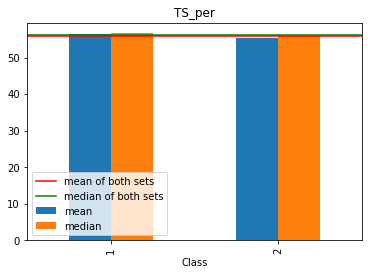

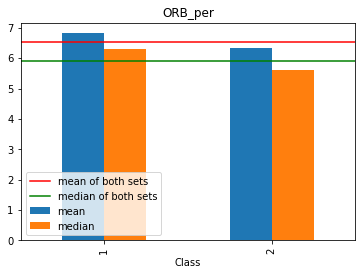

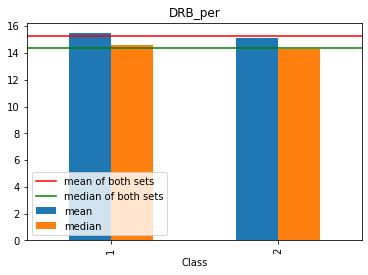

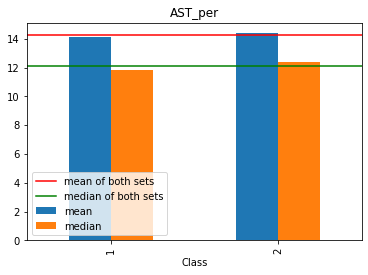

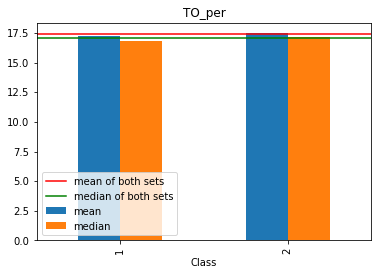

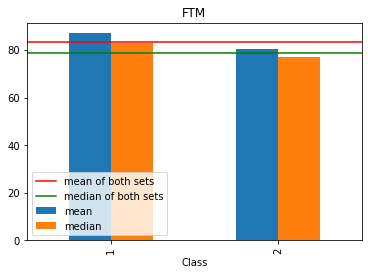

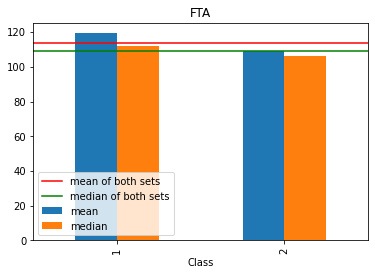

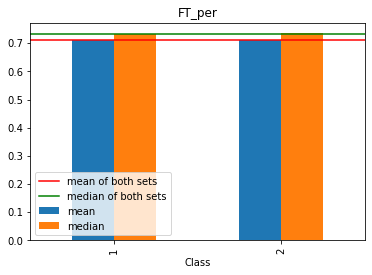

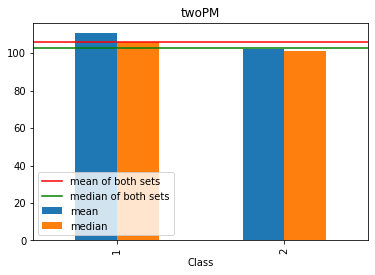

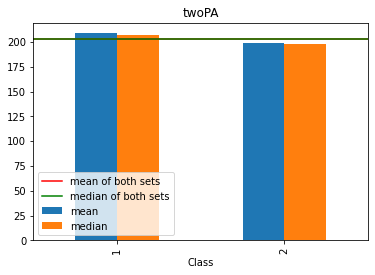

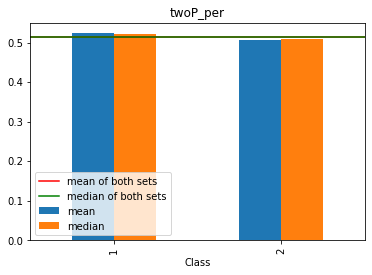

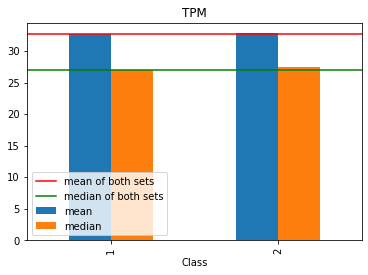

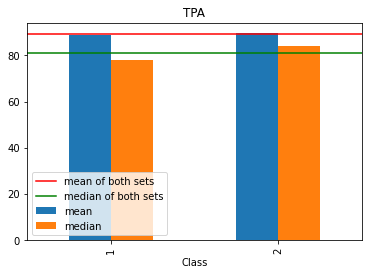

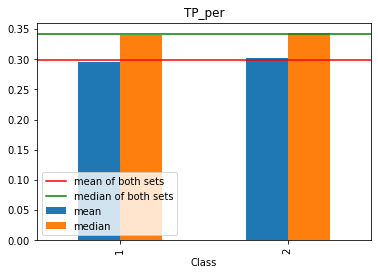

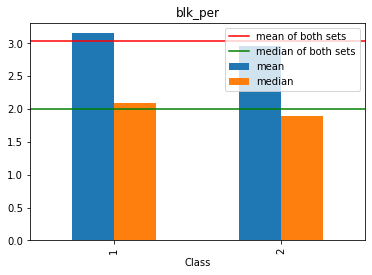

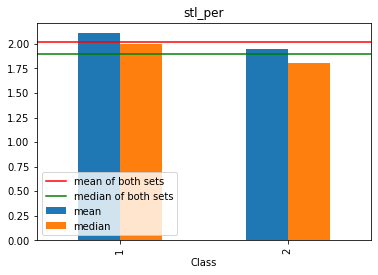

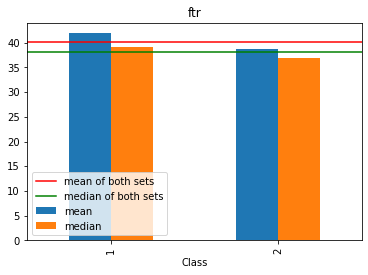

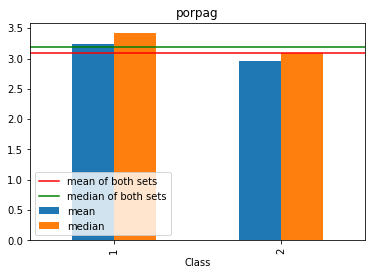

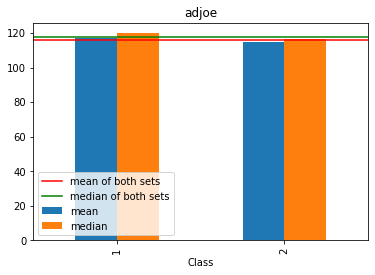

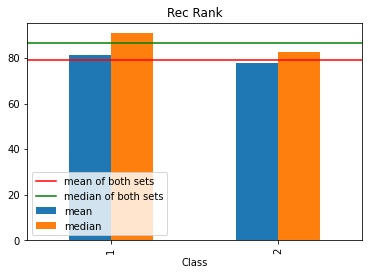

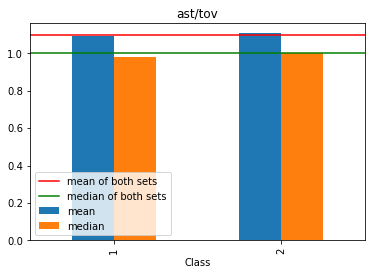

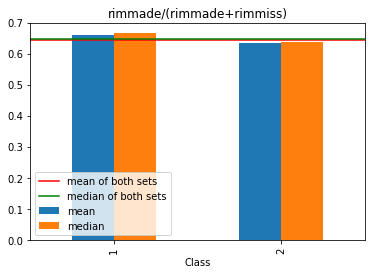

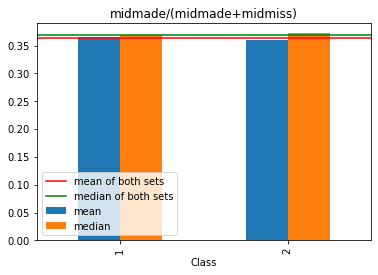

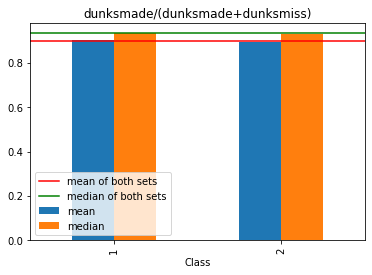

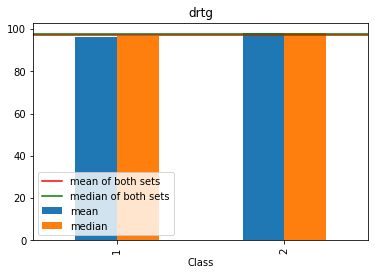

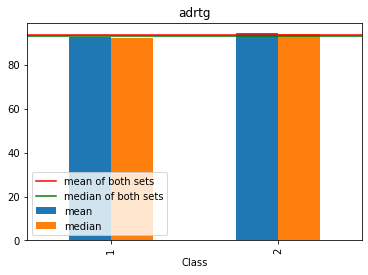

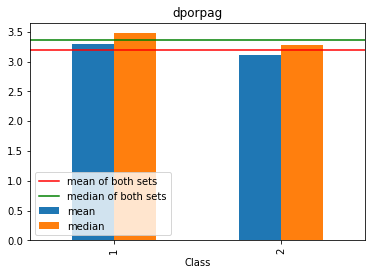

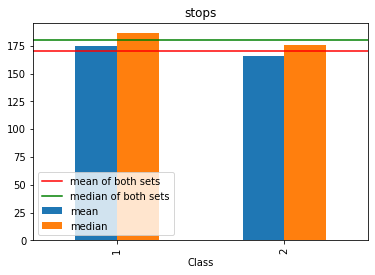

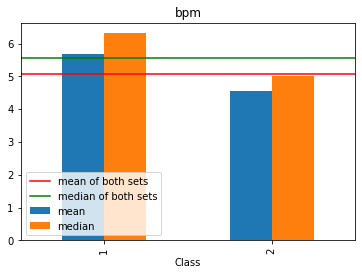

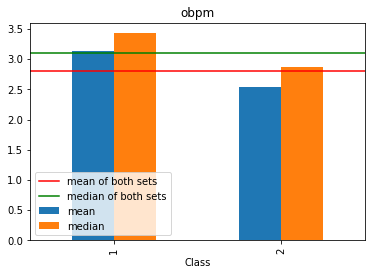

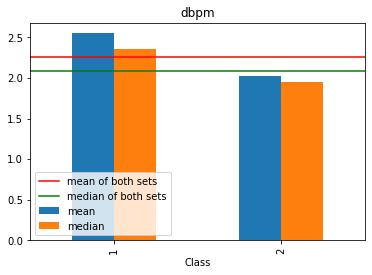

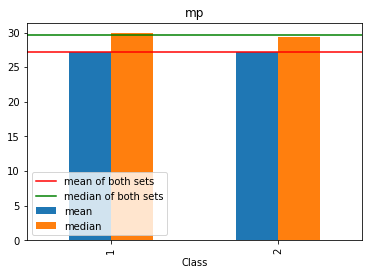

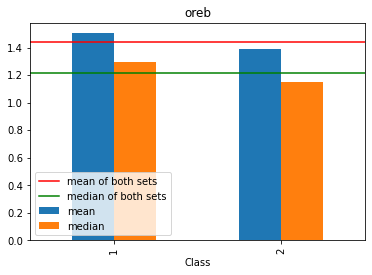

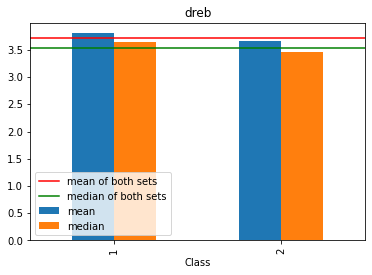

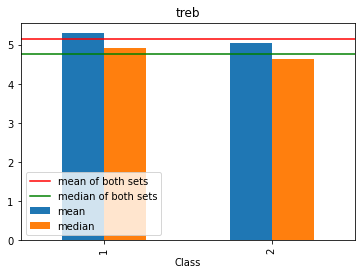

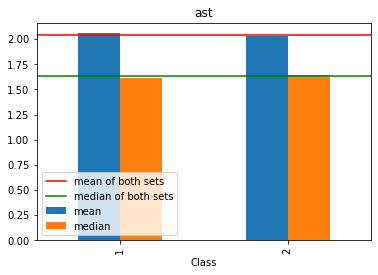

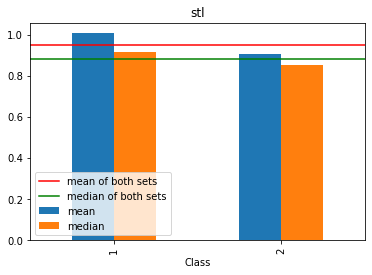

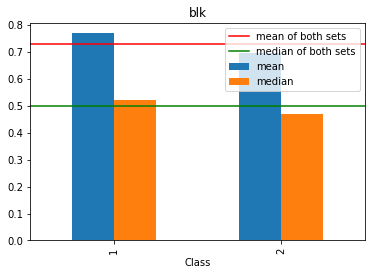

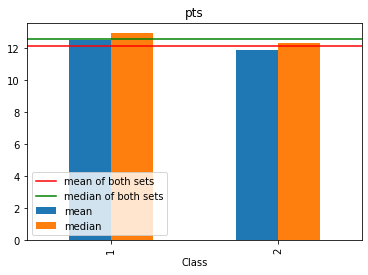

In [62]:
# Plotting graphs to compare means and median between numeric variables in each class

from cProfile import label


for i in plotting:
    agg_data[i].plot(kind='bar')
    plt.axhline(data[i].mean(), color='red', label='mean of both sets')
    plt.axhline(data[i].median(), color='green', label='median of both sets')
    plt.title(i)
    plt.legend()
    plt.show()

### Insights - Numeric Variables
Visually, there is a difference between means group by class for these variables: 'ORB_per', 'AST_per', 'FTM', 'FTA', 'twoPM', 'twoPA', 'TPA', 'blk_per', 'stl_per', 'ftr','porpag', 'Rec Rank', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'treb'.

We decided to run Welch's ttests on each variables to see if there's a significant difference in their means.

In [63]:
from scipy.stats import ttest_ind

# Creating a funtion to print and return variable name and p-value assocaited with its respective t-test
def ttest(A, B, i):
    tstat, pval = ttest_ind(A[i], B[i], equal_var=False)
    print('{}: {}'.format(i, pval))
    return i, pval

# Selected variables for t-test
selected_cols = ['ORB_per', 'AST_per', 'FTM', 'FTA', 'twoPM', 'twoPA', 'TPA', 'blk_per', 'stl_per', 'ftr','porpag', 'Rec Rank', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'treb']

# Initializing lists to append p-values with less than 0.05 significance level
pvals = []
names = []

for i in selected_cols:
    name, pval = ttest(first_round, second_round, i)
    if pval < 0.05:
        pvals.append(pval)
        names.append(name)

ORB_per: 0.022373504852642424
AST_per: 0.621992229705563
FTM: 0.009444412850011795
FTA: 0.0028624530479329164
twoPM: 0.0064073991953251365
twoPA: 0.06536280957203949
TPA: 0.8773818139073044
blk_per: 0.19864422848815047
stl_per: 0.0011703897631473801
ftr: 0.007876589814481463
porpag: 0.0012601397952812577
Rec Rank: nan
dporpag: 0.0018221762124607823
stops: 0.007943730987877502
bpm: 6.98917383744234e-08
obpm: 0.00017316169081619452
dbpm: 2.133746860607521e-05
treb: 0.04675470710915651


In [64]:
# Rec Rank has null values so separate t-test was done
tstat, pval = ttest_ind(first_round['Rec Rank'].dropna(), second_round['Rec Rank'].dropna(), equal_var=False)
pvals.append(pval)
names.append('Rec Rank')

<function matplotlib.pyplot.show(close=None, block=None)>

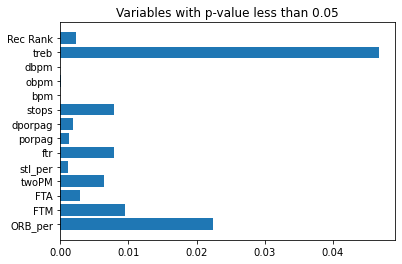

In [65]:
plt.barh(names, pvals)
plt.title('Variables with p-value less than 0.05')
plt.show

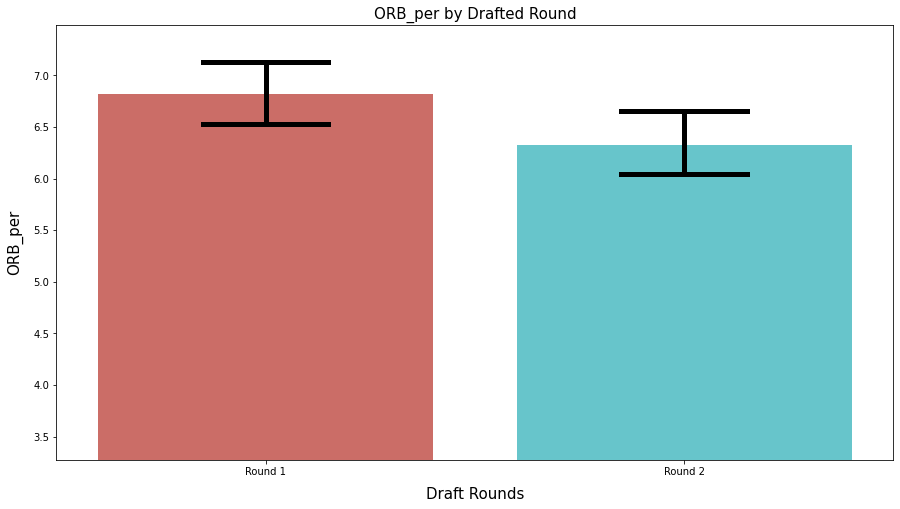

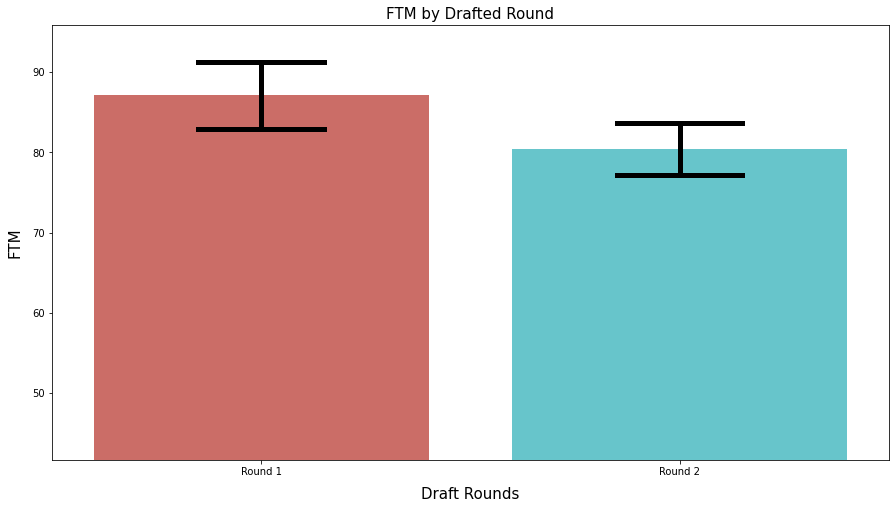

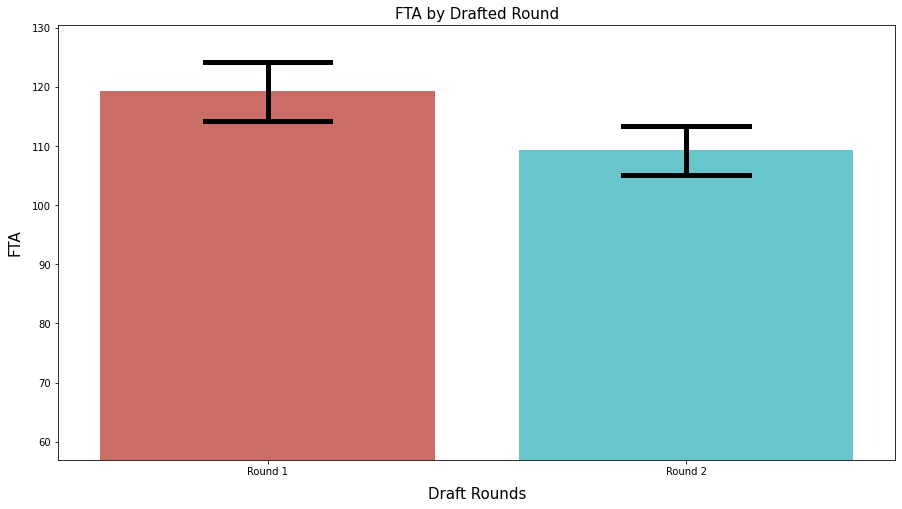

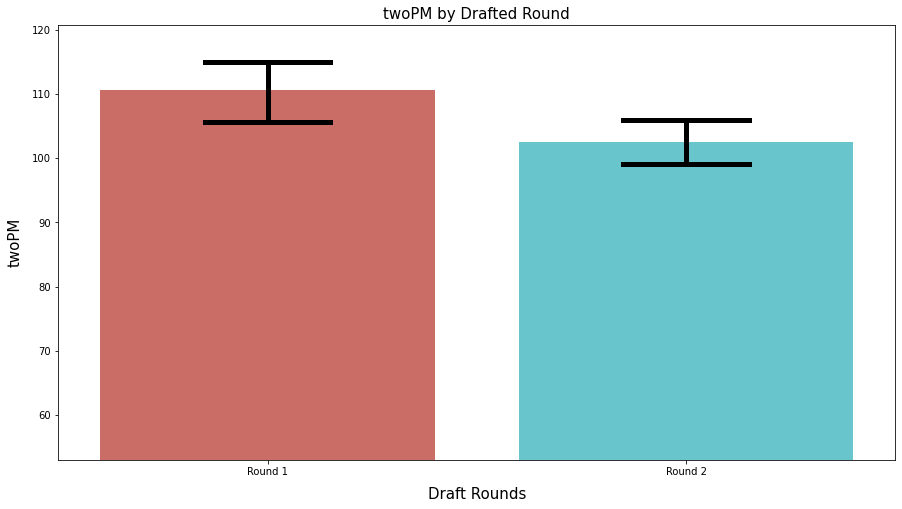

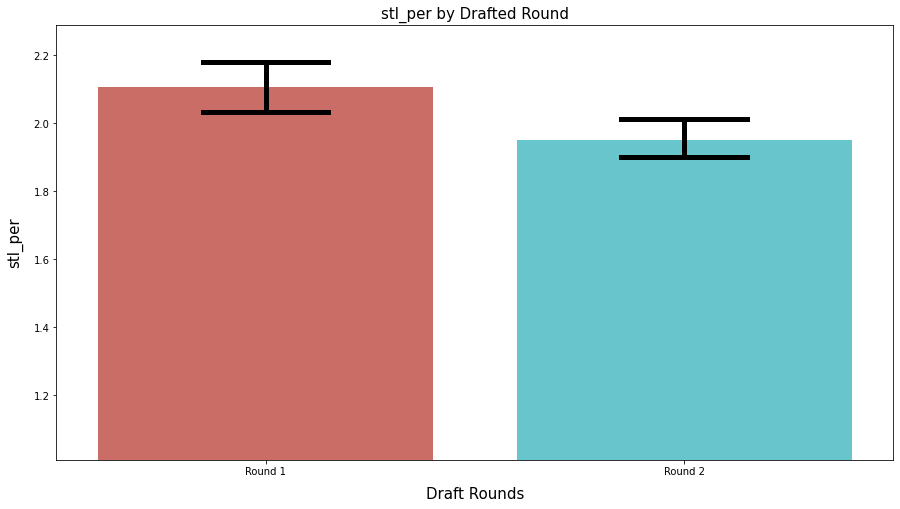

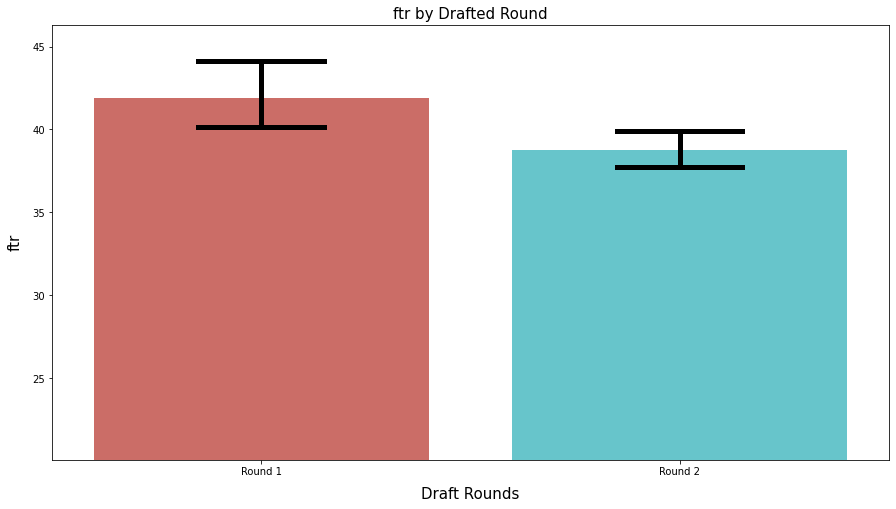

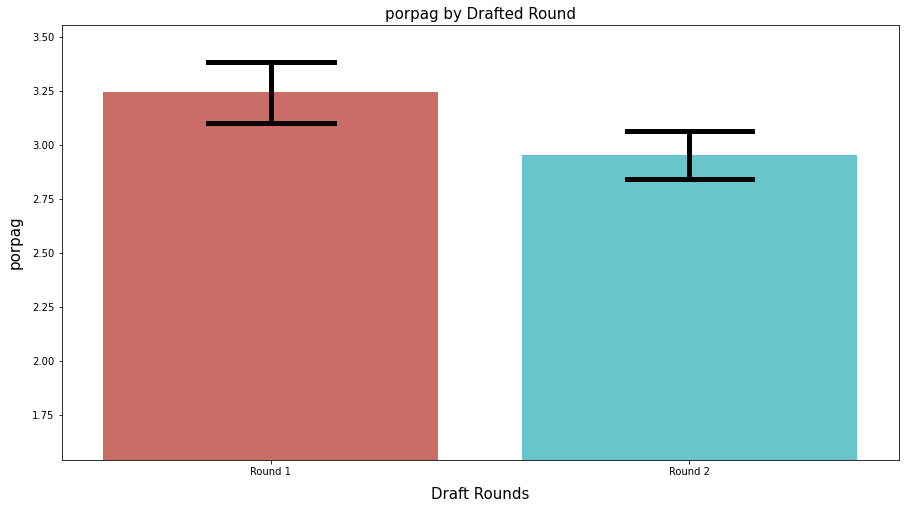

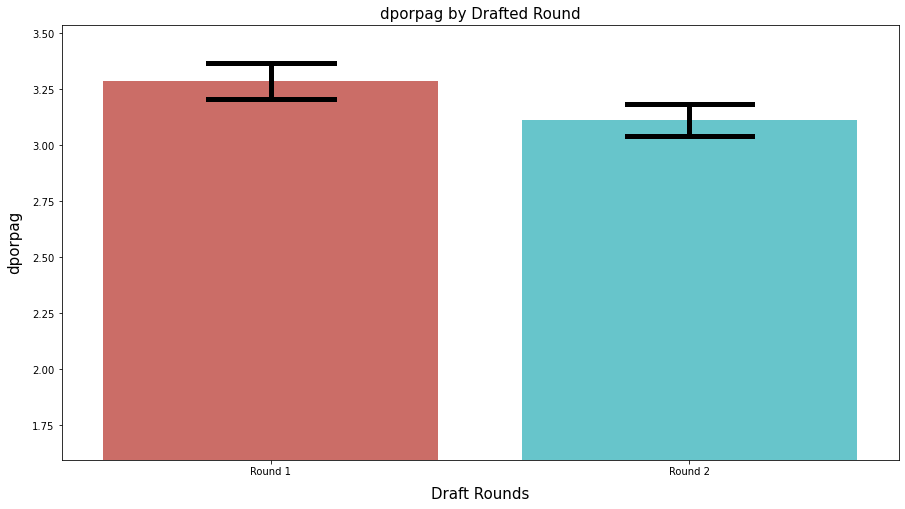

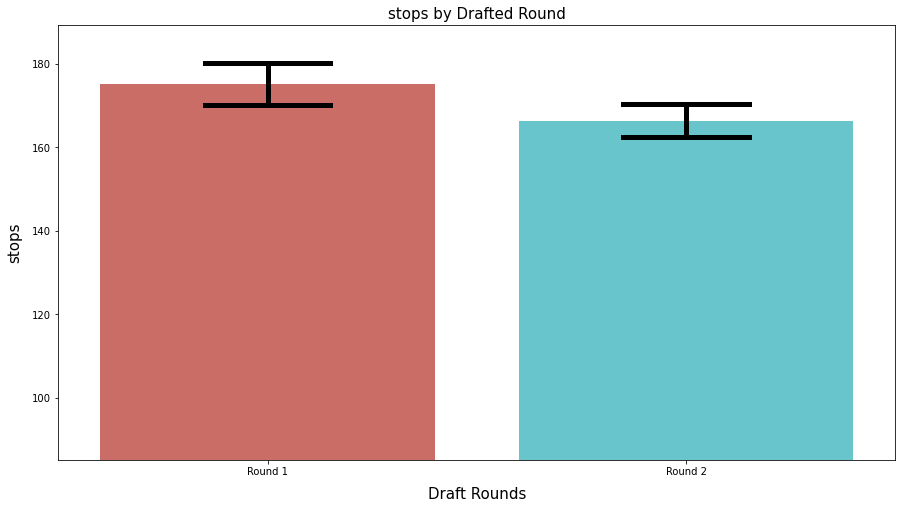

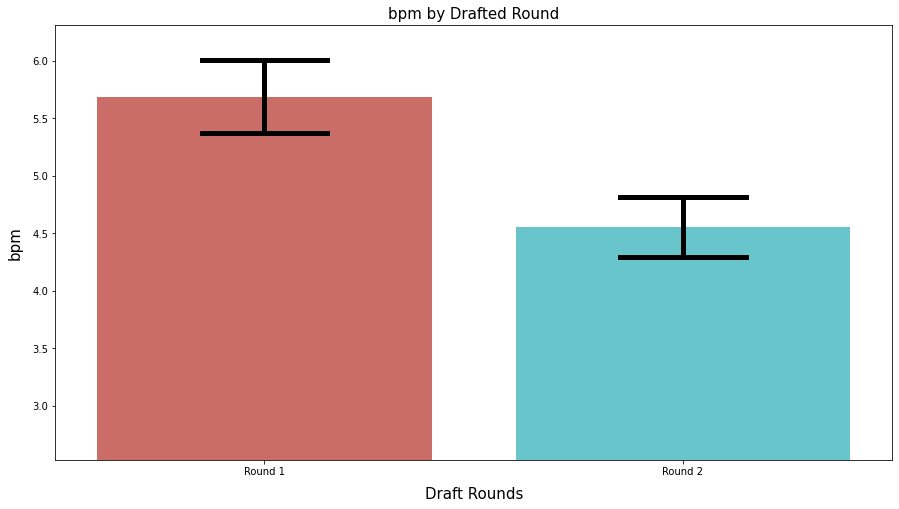

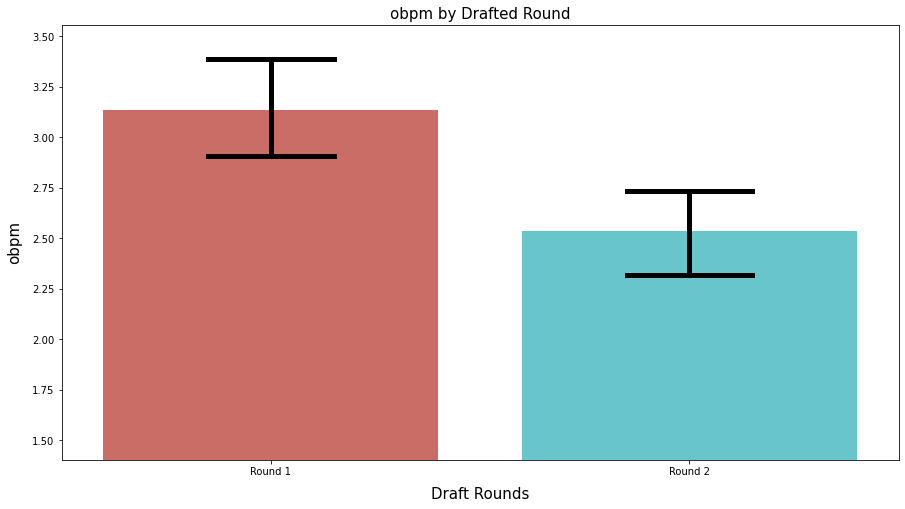

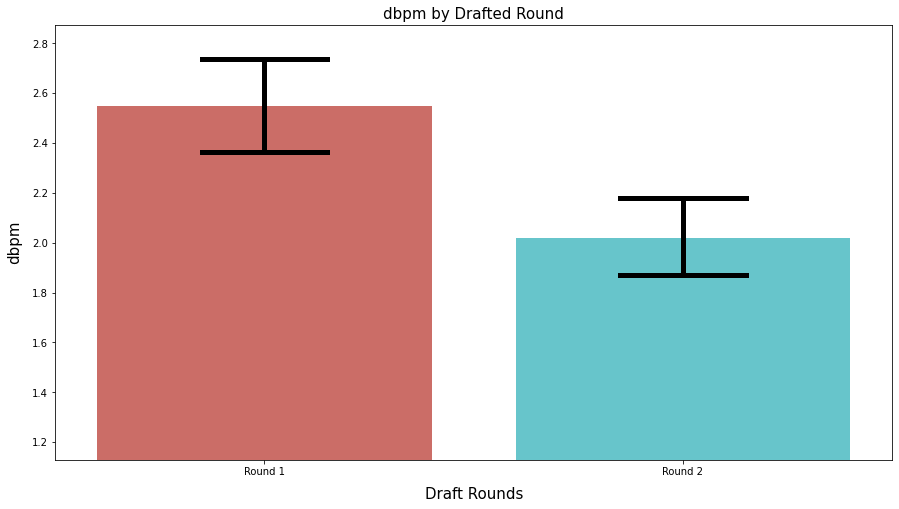

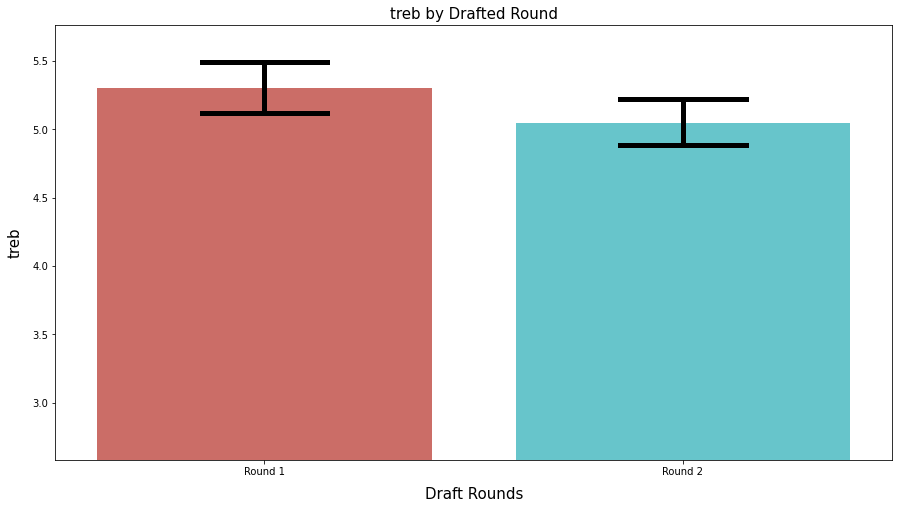

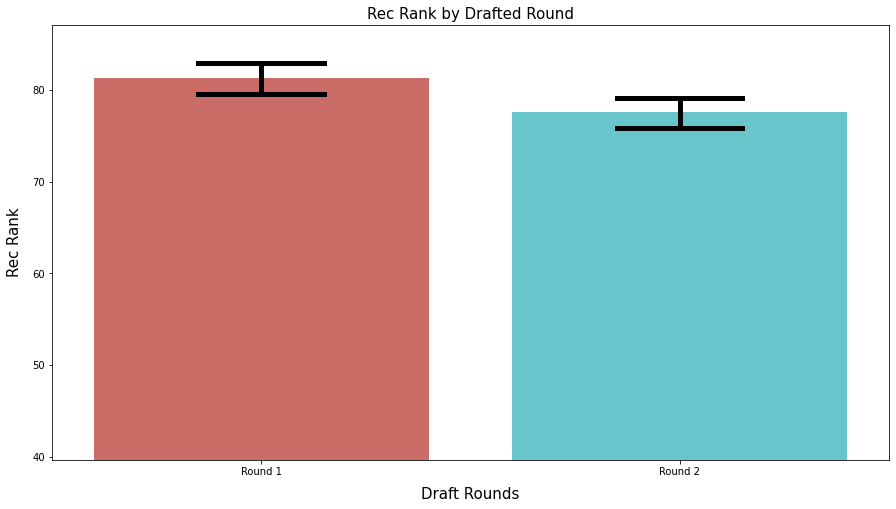

In [86]:
for i in names:
    plt.figure(figsize=(15,8))
    sns.barplot(x='Class', y=i, data=data, errcolor='black', errwidth=5, palette='hls', capsize=0.3)
    plt.title('{} by Drafted Round'.format(i), fontsize=15)
    plt.xlabel('Draft Rounds', fontsize=15, labelpad=10)
    plt.ylabel(i, fontsize=15, labelpad=10)
    plt.xticks(ticks=[0,1], labels=['Round 1', 'Round 2'])
    plt.ylim(data[i].mean()*0.5)
    plt.show()

### Conclusions
While the dataset has many variables, there seems to be a handful variables that visually and statsically show differences between classes. Some but not all include conference, graduation status, offensive rebounds per game, and box plus minus. In feature_and_models.ipynb, we put these selected predictors as with the others to the test.